In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
from plottable import ColumnDefinition, Table
from plottable.cmap import normed_cmap
from plottable.plots import image, circled_image
from plottable.formatters import decimal_to_percent
import psycopg2 as pg
import os
from dotenv import load_dotenv
import random
random.seed(73)

load_dotenv()
current_directory = os.environ["current_directory"]

In [2]:
connection_string = os.environ["connection_string"]
conn = pg.connect(connection_string)
cur = conn.cursor()
cur.execute("""SELECT DISTINCT p.id, p.name, t.team, p.position
                FROM players AS p
                JOIN tracking AS t ON p.id = t.player_id
                WHERE p.position IN (
                    'OLB', 'CB', 'SS', 'ILB', 'DT', 'FS',
                    'MLB', 'NT', 'DB', 'DE'
                    )
                """)
defensive_players = cur.fetchall()

In [3]:
cols = [
        "id",
        "Player",
        "Team",
        "Position"
    ]
    
df = pd.DataFrame(defensive_players, columns = cols)

In [4]:
df['logo'] = df['Team'].apply(
        lambda x: 
    f"{current_directory}/team_logos/{x}_logo.png"
    )

In [5]:
df["profile_picture"] = np.nan

In [6]:
df = df[['profile_picture', 'Player', 'logo', 'Team', 'Position']]

In [7]:
bg_color = "#FFFFFF"
text_color = "#000000"
    
row_colors = {"#91C465", "D0F0C0", "F0FFF0", "F5FFFA"}
    
plt.rcParams['text.color'] = text_color
plt.rcParams['font.family'] = "monospace"

In [8]:
df["tackles_above_expected"] = [round(random.uniform(-20, 20), 2) for _ in range(len(df))]

In [9]:
# Add and populate dummy tackle type place holders 
tackle_types = ["five_star", "four_star", "three_star", "two_star", "one_star", "total"]

for tackle in tackle_types:
    tackles = [random.choices([0, 1, 2, 3], weights=[0.60, 0.20, 0.15, 0.05])[0] for _ in range(len(df))]
    df[f"{tackle}_tackles"] = tackles
    df[f"{tackle}_opportunities"] = [random.randrange(4, 100) for _ in range(len(df))]
    df[f"{tackle}_percentage"] = round(df[f"{tackle}_tackles"] / df[f"{tackle}_opportunities"], 2)



In [10]:
mock_table = df.sort_values(by = "tackles_above_expected", ascending = False).head(10)

In [11]:
def get_profile_picture_file_path(player):
    divided_name = player.split()
    return f"{current_directory}/profile_photos/{divided_name[0]}_{divided_name[1]}.png"

In [12]:
mock_table['profile_picture'] = mock_table['Player'].apply(get_profile_picture_file_path)

In [13]:
mock_table = mock_table.reset_index(drop = True)

In [14]:
mock_table

,profile_picture,Player,logo,Team,Position,tackles_above_expected,five_star_tackles,five_star_opportunities,five_star_percentage,four_star_tackles,...,three_star_percentage,two_star_tackles,two_star_opportunities,two_star_percentage,one_star_tackles,one_star_opportunities,one_star_percentage,total_tackles,total_opportunities,total_percentage
0,/Users/winch/Data Science & Machine Learning P...,Lamarcus Joyner,/Users/winch/Data Science & Machine Learning P...,NYJ,SS,19.96,0,79,0.00,0,...,0.00,0,36,0.00,0,14,0.00,0,32,0.00
1,/Users/winch/Data Science & Machine Learning P...,Derion Kendrick,/Users/winch/Data Science & Machine Learning P...,LA,CB,19.95,3,12,0.25,2,...,0.00,0,12,0.00,0,13,0.00,0,75,0.00
2,/Users/winch/Data Science & Machine Learning P...,Xavien Howard,/Users/winch/Data Science & Machine Learning P...,MIA,CB,19.94,0,69,0.00,0,...,0.00,0,10,0.00,0,33,0.00,1,88,0.01
3,/Users/winch/Data Science & Machine Learning P...,Sheldon Rankins,/Users/winch/Data Science & Machine Learning P...,NYJ,DT,19.92,0,27,0.00,0,...,0.00,1,25,0.04,0,42,0.00,0,17,0.00
4,/Users/winch/Data Science & Machine Learning P...,B.J. Hill,/Users/winch/Data Science & Machine Learning P...,CIN,DT,19.83,2,74,0.03,0,...,0.04,0,91,0.00,0,36,0.00,3,30,0.10
5,/Users/winch/Data Science & Machine Learning P...,Daniel Wise,/Users/winch/Data Science & Machine Learning P...,WAS,DE,19.81,0,64,0.00,2,...,0.05,1,17,0.06,1,30,0.03,0,97,0.00
6,/Users/winch/Data Science & Machine Learning P...,Trey Flowers,/Users/winch/Data Science & Machine Learning P...,MIA,OLB,19.78,2,62,0.03,0,...,0.06,0,60,0.00,0,17,0.00,1,74,0.01
7,/Users/winch/Data Science & Machine Learning P...,Johnathan Hankins,/Users/winch/Data Science & Machine Learning P...,DAL,NT,19.77,0,45,0.00,1,...,0.00,0,8,0.00,0,58,0.00,0,92,0.00
8,/Users/winch/Data Science & Machine Learning P...,Danielle Hunter,/Users/winch/Data Science & Machine Learning P...,MIN,OLB,19.76,1,97,0.01,0,...,0.00,0,87,0.00,0,28,0.00,0,95,0.00
9,/Users/winch/Data Science & Machine Learning P...,Blake Cashman,/Users/winch/Data Science & Machine Learning P...,HOU,ILB,19.68,2,85,0.02,2,...,0.00,0,15,0.00,0,45,0.00,2,25,0.08


In [15]:
mock_table['Rank'] = mock_table["tackles_above_expected"].rank(ascending=False).astype(int)

In [16]:
mock_table = mock_table[['Rank','profile_picture', 'Player', 'logo', 'Team', 'Position',
       'tackles_above_expected', 'five_star_tackles', 'five_star_opportunities',
       'five_star_percentage', 'four_star_tackles', 'four_star_opportunities',
       'four_star_percentage', 'three_star_tackles', 'three_star_opportunities',
       'three_star_percentage', 'two_star_tackles', 'two_star_opportunities',
       'two_star_percentage', 'one_star_tackles', 'one_star_opportunities',
       'one_star_percentage', 'total_tackles', 'total_opportunities',
       'total_percentage']]

In [17]:
mock_table

,Rank,profile_picture,Player,logo,Team,Position,tackles_above_expected,five_star_tackles,five_star_opportunities,five_star_percentage,...,three_star_percentage,two_star_tackles,two_star_opportunities,two_star_percentage,one_star_tackles,one_star_opportunities,one_star_percentage,total_tackles,total_opportunities,total_percentage
0,1,/Users/winch/Data Science & Machine Learning P...,Lamarcus Joyner,/Users/winch/Data Science & Machine Learning P...,NYJ,SS,19.96,0,79,0.00,...,0.00,0,36,0.00,0,14,0.00,0,32,0.00
1,2,/Users/winch/Data Science & Machine Learning P...,Derion Kendrick,/Users/winch/Data Science & Machine Learning P...,LA,CB,19.95,3,12,0.25,...,0.00,0,12,0.00,0,13,0.00,0,75,0.00
2,3,/Users/winch/Data Science & Machine Learning P...,Xavien Howard,/Users/winch/Data Science & Machine Learning P...,MIA,CB,19.94,0,69,0.00,...,0.00,0,10,0.00,0,33,0.00,1,88,0.01
3,4,/Users/winch/Data Science & Machine Learning P...,Sheldon Rankins,/Users/winch/Data Science & Machine Learning P...,NYJ,DT,19.92,0,27,0.00,...,0.00,1,25,0.04,0,42,0.00,0,17,0.00
4,5,/Users/winch/Data Science & Machine Learning P...,B.J. Hill,/Users/winch/Data Science & Machine Learning P...,CIN,DT,19.83,2,74,0.03,...,0.04,0,91,0.00,0,36,0.00,3,30,0.10
5,6,/Users/winch/Data Science & Machine Learning P...,Daniel Wise,/Users/winch/Data Science & Machine Learning P...,WAS,DE,19.81,0,64,0.00,...,0.05,1,17,0.06,1,30,0.03,0,97,0.00
6,7,/Users/winch/Data Science & Machine Learning P...,Trey Flowers,/Users/winch/Data Science & Machine Learning P...,MIA,OLB,19.78,2,62,0.03,...,0.06,0,60,0.00,0,17,0.00,1,74,0.01
7,8,/Users/winch/Data Science & Machine Learning P...,Johnathan Hankins,/Users/winch/Data Science & Machine Learning P...,DAL,NT,19.77,0,45,0.00,...,0.00,0,8,0.00,0,58,0.00,0,92,0.00
8,9,/Users/winch/Data Science & Machine Learning P...,Danielle Hunter,/Users/winch/Data Science & Machine Learning P...,MIN,OLB,19.76,1,97,0.01,...,0.00,0,87,0.00,0,28,0.00,0,95,0.00
9,10,/Users/winch/Data Science & Machine Learning P...,Blake Cashman,/Users/winch/Data Science & Machine Learning P...,HOU,ILB,19.68,2,85,0.02,...,0.00,0,15,0.00,0,45,0.00,2,25,0.08


In [18]:
mock_table.columns

Index(['Rank', 'profile_picture', 'Player', 'logo', 'Team', 'Position',
       'tackles_above_expected', 'five_star_tackles',
       'five_star_opportunities', 'five_star_percentage', 'four_star_tackles',
       'four_star_opportunities', 'four_star_percentage', 'three_star_tackles',
       'three_star_opportunities', 'three_star_percentage', 'two_star_tackles',
       'two_star_opportunities', 'two_star_percentage', 'one_star_tackles',
       'one_star_opportunities', 'one_star_percentage', 'total_tackles',
       'total_opportunities', 'total_percentage'],
      dtype='object')

In [19]:
col_defs = [
    ColumnDefinition(
        name = "Rank",
        textprops = {"ha": "center", "weight":"bold"},
        width = 0.4
    ),
    ColumnDefinition(
        name = "profile_picture",
        textprops = {"ha": "center", "va":"center", "color": bg_color},
        width = 0.5,
        plot_fn = circled_image
    ),
    ColumnDefinition(
        name = "Player",
        title = "Player",
        textprops = {"ha": "left", "weight":"bold"},
        width = 1.15,
    ),
      ColumnDefinition(
        name = "logo",
        title = "Team",
        textprops = {"ha": "center", "va":"center", "color": text_color},
        width = 0.5,
        plot_fn = image
    ),
    ColumnDefinition(
        name = "Position",
        textprops = {"ha": "center"},
        width = 0.5,
    ),
    ColumnDefinition(
        name = "tackles_above_expected",
        title = "TAE",
        textprops = {"ha": "center", "color": text_color, "weight":"bold", "bbox": {"boxstyle": "circle", "pad": .35}},
        cmap = normed_cmap(mock_table["tackles_above_expected"], cmap = plt.cm.PiYG, num_stds=2),
        width = 0.75,
    ),
    ColumnDefinition(
        name = "five_star_tackles",
        title = "Tk",
        group = "5 Star (0-25%)",
        textprops = {"ha": "center"},
        width = 0.5,
        border="left"
    ),
     ColumnDefinition(
        name = "five_star_opportunities",
        title = "Opp",
        group = "5 Star (0-25%)",
        textprops = {"ha": "center"},
        width = 0.5 
    ),
     ColumnDefinition(
        name = "five_star_percentage",
        title = "%",
        group = "5 Star (0-25%)",
        formatter=decimal_to_percent, 
        textprops = {"ha": "center"},
        width = 0.5 
    ),
        ColumnDefinition(
        name = "four_star_tackles",
        title = "Tk",
        group = "4 Star (26-50%)",
        textprops = {"ha": "center"},
        width = 0.5,
        border="left"
    ),
     ColumnDefinition(
        name = "four_star_opportunities",
        group = "4 Star (26-50%)",
        title = "Opp",
        textprops = {"ha": "center"},
        width = 0.5,
    ),
     ColumnDefinition(
        name = "four_star_percentage",
        group = "4 Star (26-50%)",
        title = "%",
        formatter=decimal_to_percent, 
        textprops = {"ha": "center"},
        width = 0.5 
    ),
        ColumnDefinition(
        name = "three_star_tackles",
        group = "3 Star (51-75%)",
        title = "Tk",
        textprops = {"ha": "center"},
        width = 0.5,
        border="left"
    ),
     ColumnDefinition(
        name = "three_star_opportunities",
        group = "3 Star (51-75%)",
        title = "Opp",
        textprops = {"ha": "center"},
        width = 0.5 
    ),
     ColumnDefinition(
        name = "three_star_percentage",
        group = "3 Star (51-75%)",
        title = "%",
        formatter=decimal_to_percent, 
        textprops = {"ha": "center"},
        width = 0.5 
    ),
        ColumnDefinition(
        name = "two_star_tackles",
        group = "2 Star (76-90%)",
        title = "Tk",
        textprops = {"ha": "center"},
        width = 0.5,
        border="left"
    ),
     ColumnDefinition(
        name = "two_star_opportunities",
        group = "2 Star (76-90%)",
        title = "Opp",
        textprops = {"ha": "center"},
        width = 0.5 
    ),
     ColumnDefinition(
        name = "two_star_percentage",
        group = "2 Star (76-90%)",
        title = "%",
        formatter=decimal_to_percent, 
        textprops = {"ha": "center"},
        width = 0.5 
    ),
        ColumnDefinition(
        name = "one_star_tackles",
        group = "1 Star (91-95%)",
        title = "Tk",
        textprops = {"ha": "center"},
        width = 0.5,
        border="left"    
    ),
     ColumnDefinition(
        name = "one_star_opportunities",
        group = "1 Star (91-95%)",
        title = "Opp",
        textprops = {"ha": "center"},
        width = 0.5 
    ),
     ColumnDefinition(
        name = "one_star_percentage",
        group = "1 Star (91-95%)",
        title = "%",
        formatter=decimal_to_percent,
        textprops = {"ha": "center"},
        width = 0.5 
    ),
        ColumnDefinition(
        name = "total_tackles",
        group = "Total",
        title = "Tk",
        textprops = {"ha": "center"},
        width = 0.5,
        border="left"
    ),
     ColumnDefinition(
        name = "total_opportunities",
        group = "Total",
        title = "Op",
        textprops = {"ha": "center"},
        width = 0.5 
    ),
     ColumnDefinition(
        name = "total_percentage",
        group = "Total",
        title = "%",
        formatter=decimal_to_percent,
        textprops = {"ha": "center"},
        width = 0.5 
    )
    
]

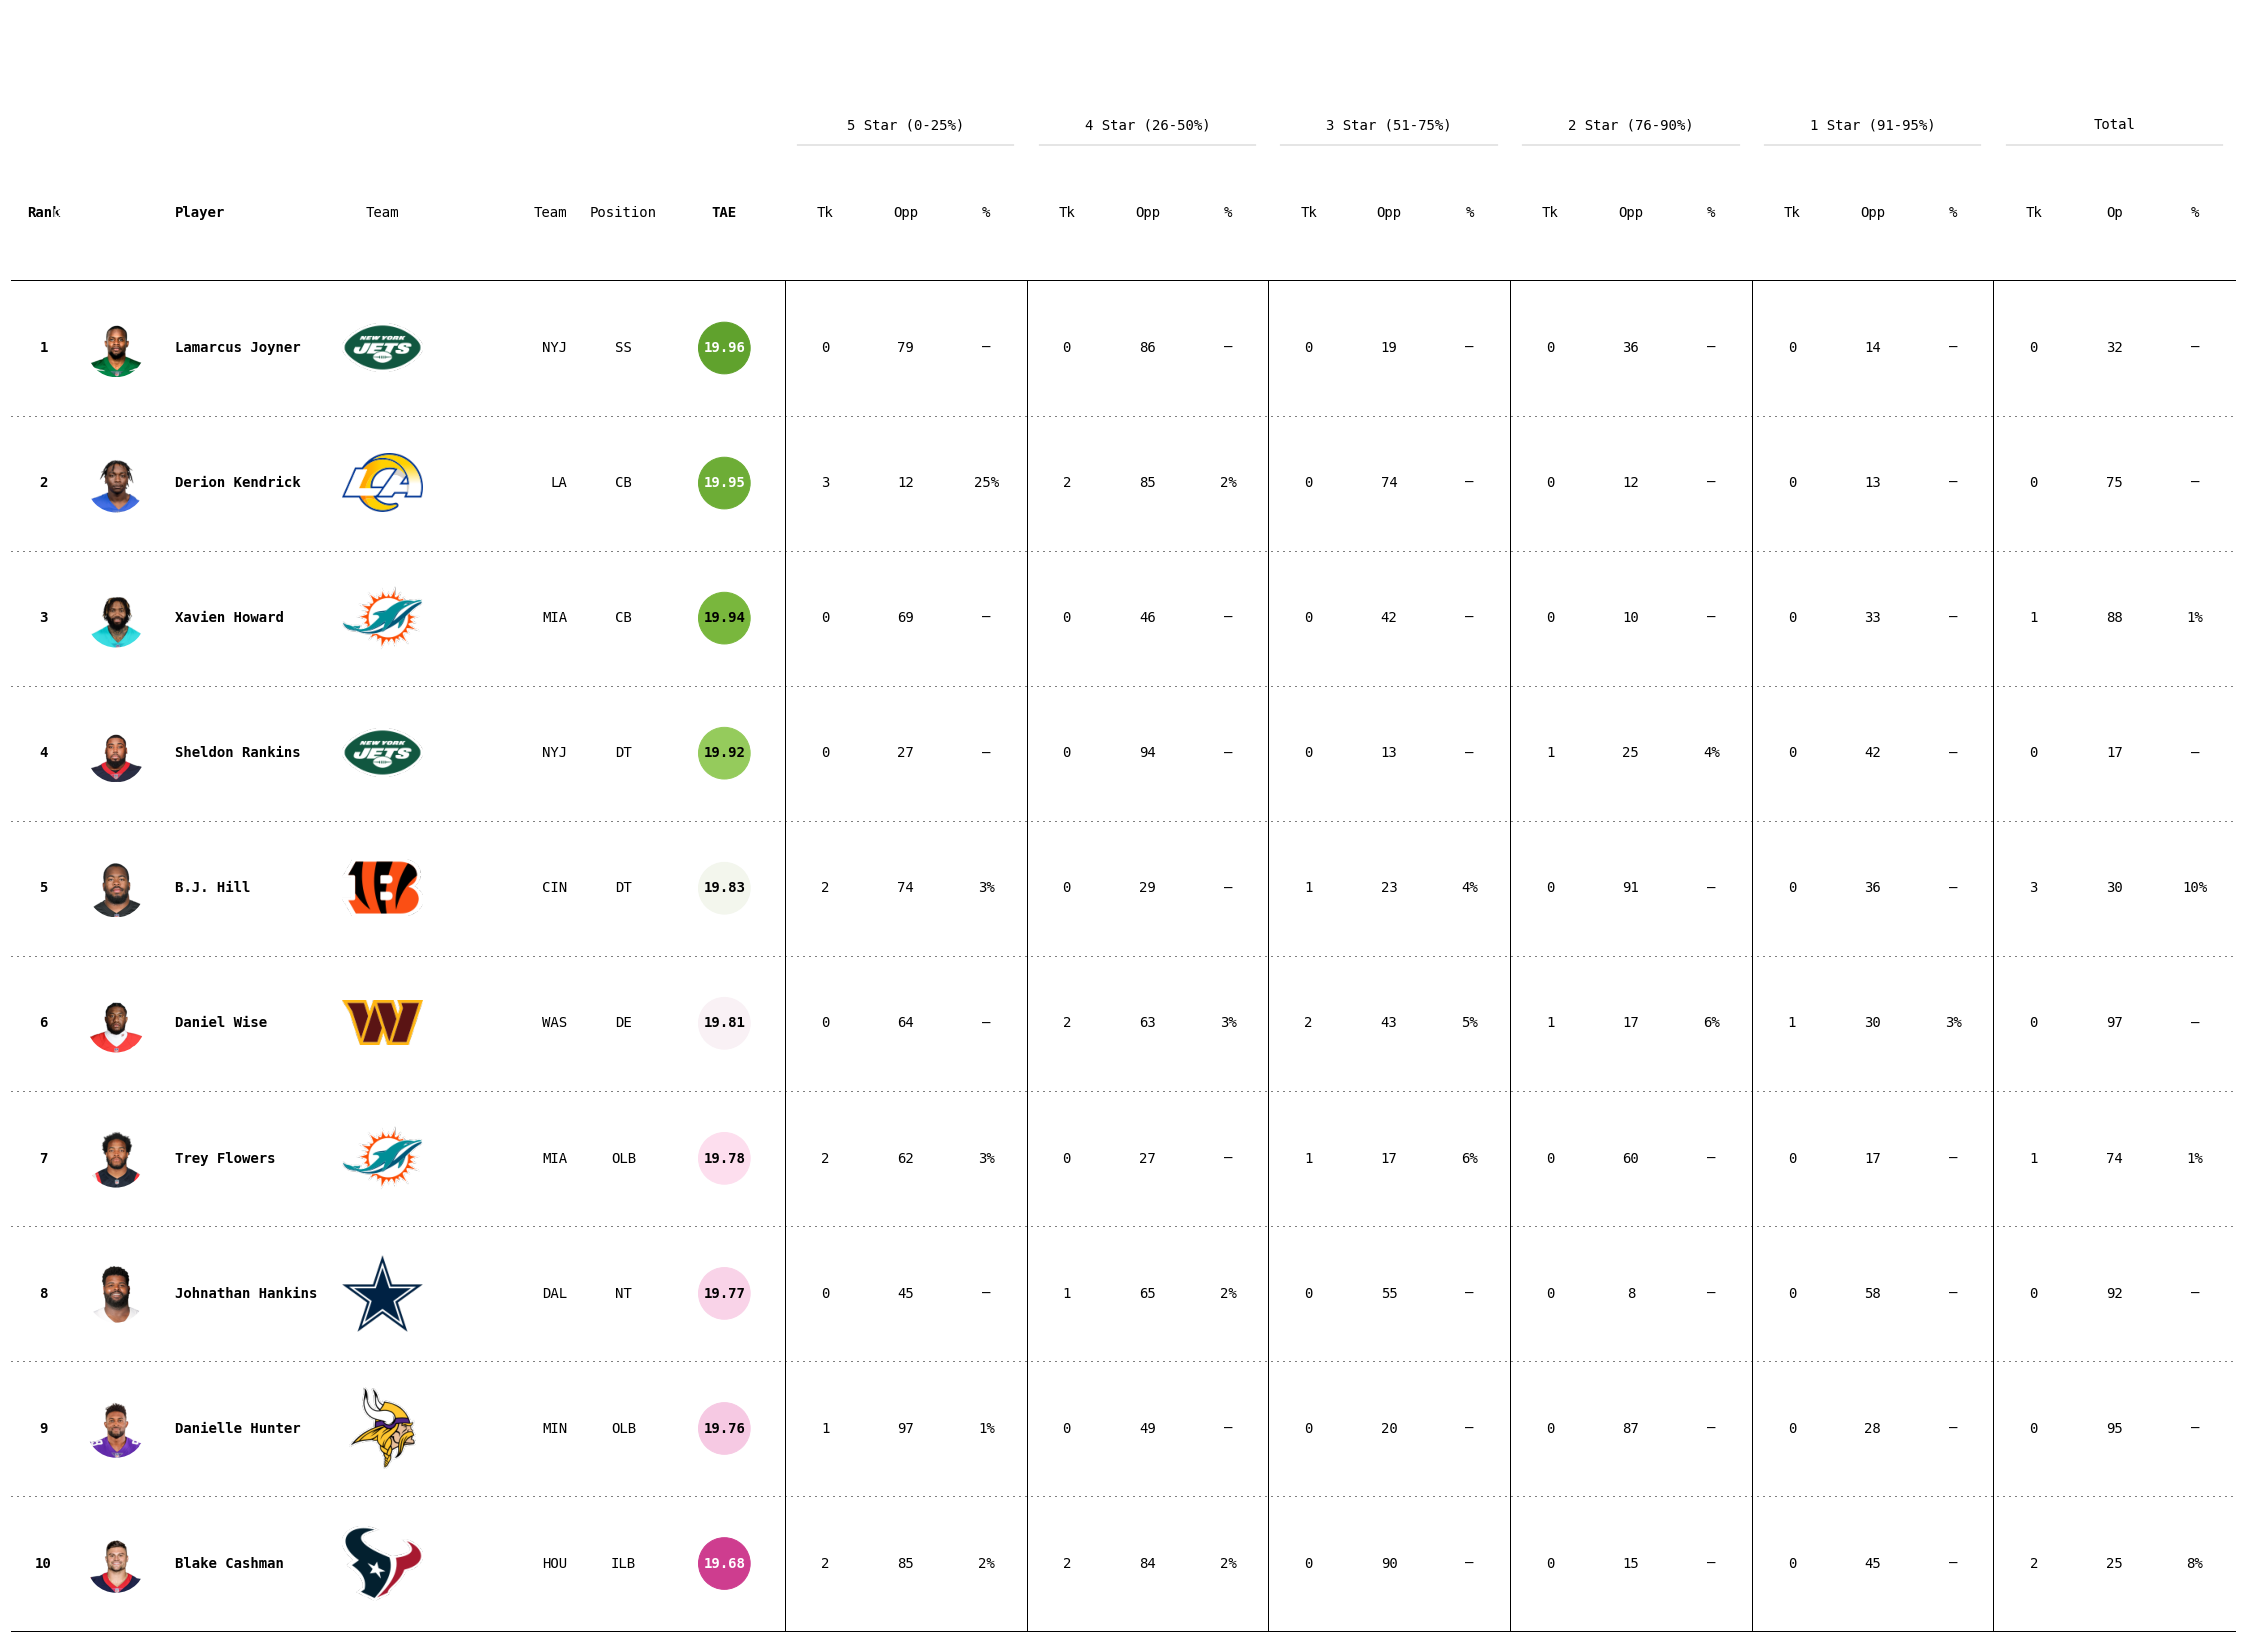

In [20]:
fig, ax = plt.subplots(figsize=(40,30))
fig.set_facecolor(bg_color)
ax.set_facecolor(bg_color)

table = Table(
    mock_table,
    column_definitions = col_defs,
    index_col = "Rank",
    row_dividers = True,
    row_divider_kw = {"linewidth":1, "linestyle": (0, (1,5))},
    footer_divider = True, 
    textprops = {"fontsize":14},
    ax = ax
).autoset_fontcolors(colnames=["tackles_above_expected"])